In [1]:
import os

current_directory = os.getcwd()
project_directory = os.path.abspath(os.path.join(current_directory, os.pardir, os.pardir))
os.chdir(project_directory)


In [13]:
import numpy as np
import pandas as pd
from src.features.resnet152 import get_resnet152_features
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA


def create_dataset(features_, classes_):
    df = pd.DataFrame(np.concatenate([features_, classes_.reshape(-1, 1)], axis=1),
                      columns=["feature_1", "feature_2", "class"])
    df["feature_1"] = pd.to_numeric(df["feature_1"])
    df["feature_2"] = pd.to_numeric(df["feature_2"])
    return df

In [3]:
features, classes = get_resnet152_features("data/merged/images/by-brands")

  0%|          | 0/778 [00:00<?, ?it/s]

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
idx_classes = classes[:, 1]
idx_classes

array(['0', '0', '0', ..., '83', '83', '83'], dtype='<U58')

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


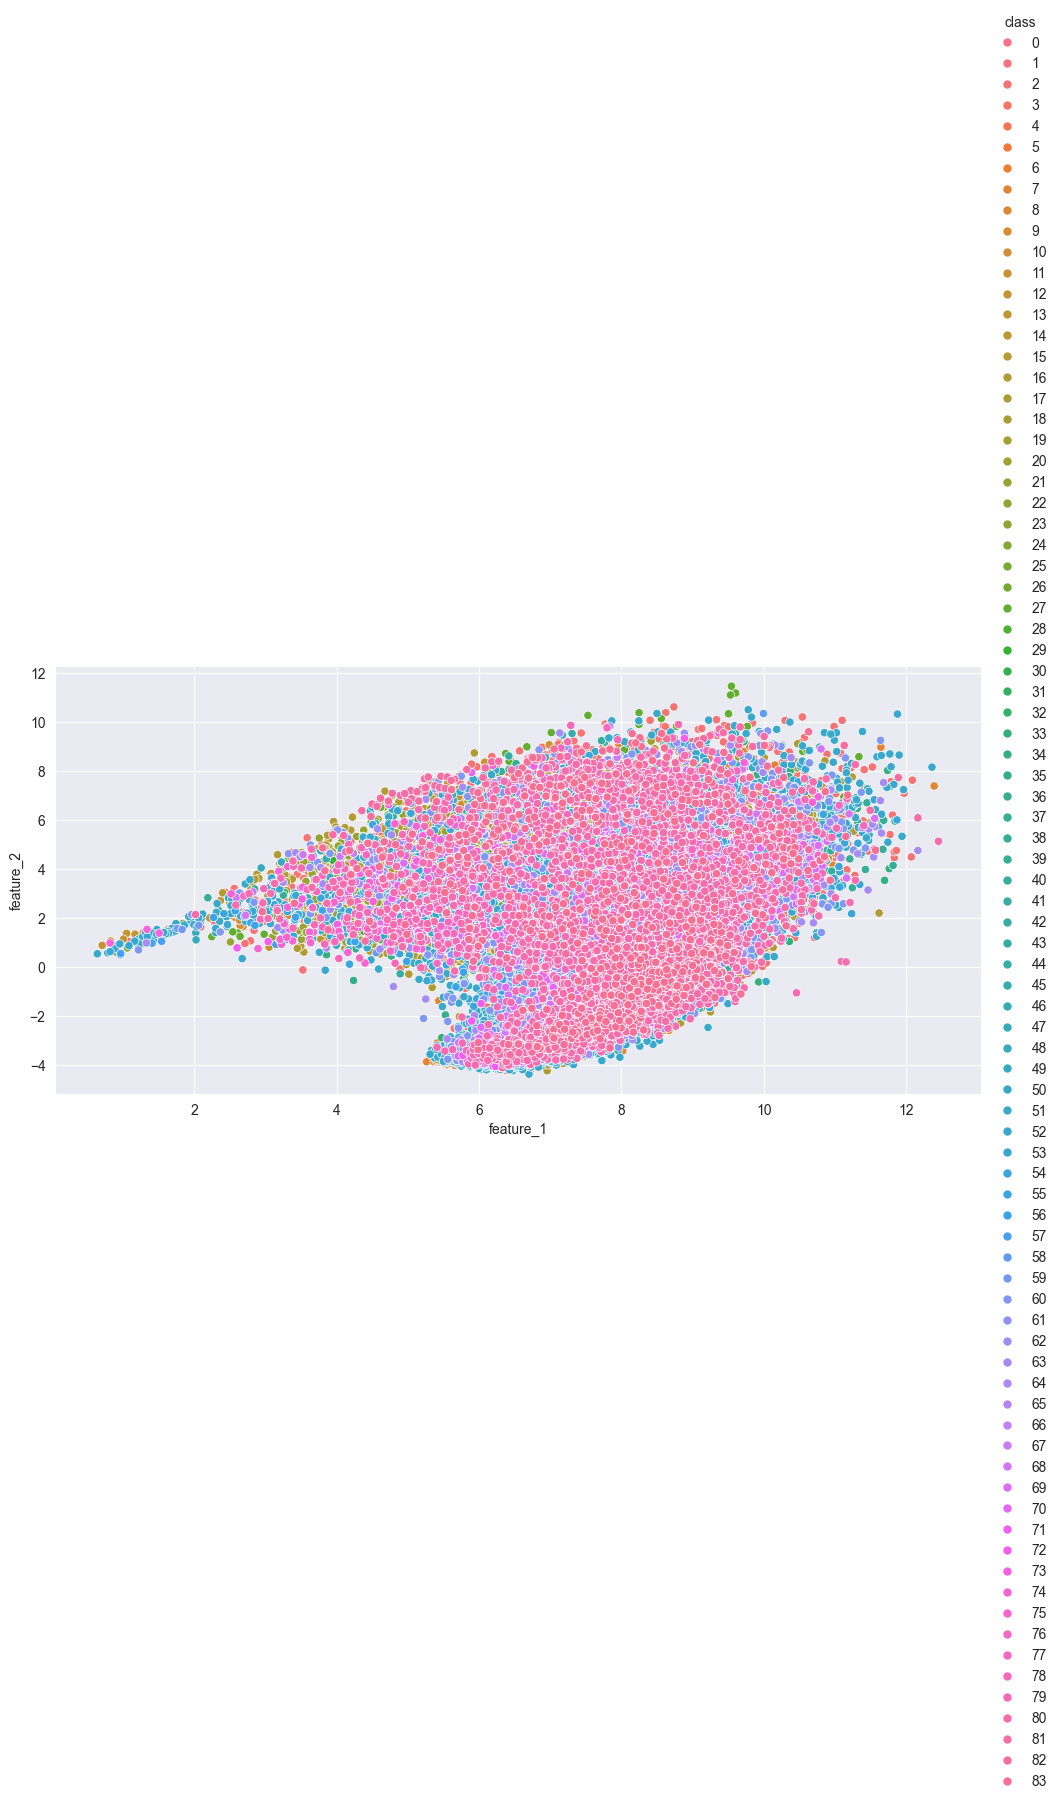

In [16]:
SVD_2 = TruncatedSVD(n_components=2).fit_transform(features)
sns.relplot(data=create_dataset(SVD_2, idx_classes), x="feature_1", y="feature_2", hue="class", aspect=2)

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


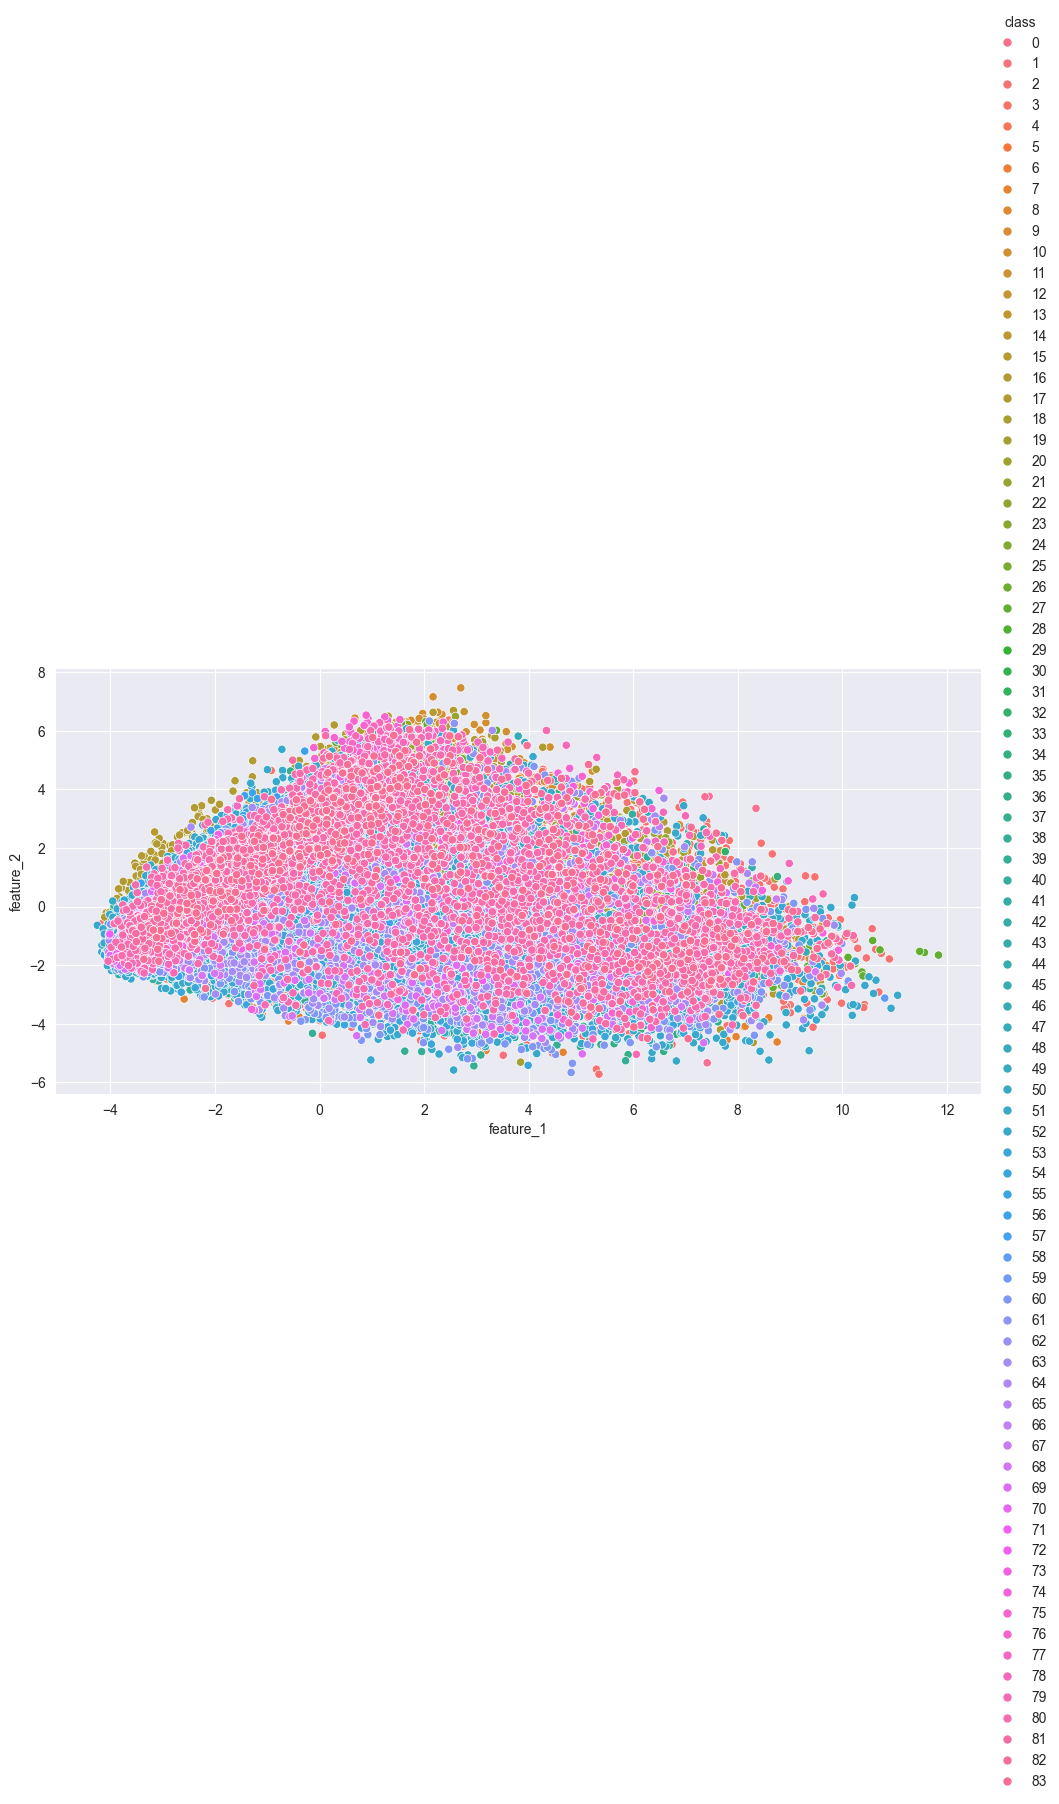

In [17]:
PCA_2 = PCA(n_components=2).fit_transform(features)
sns.relplot(data=create_dataset(PCA_2, idx_classes), x="feature_1", y="feature_2", hue="class", aspect=2)

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


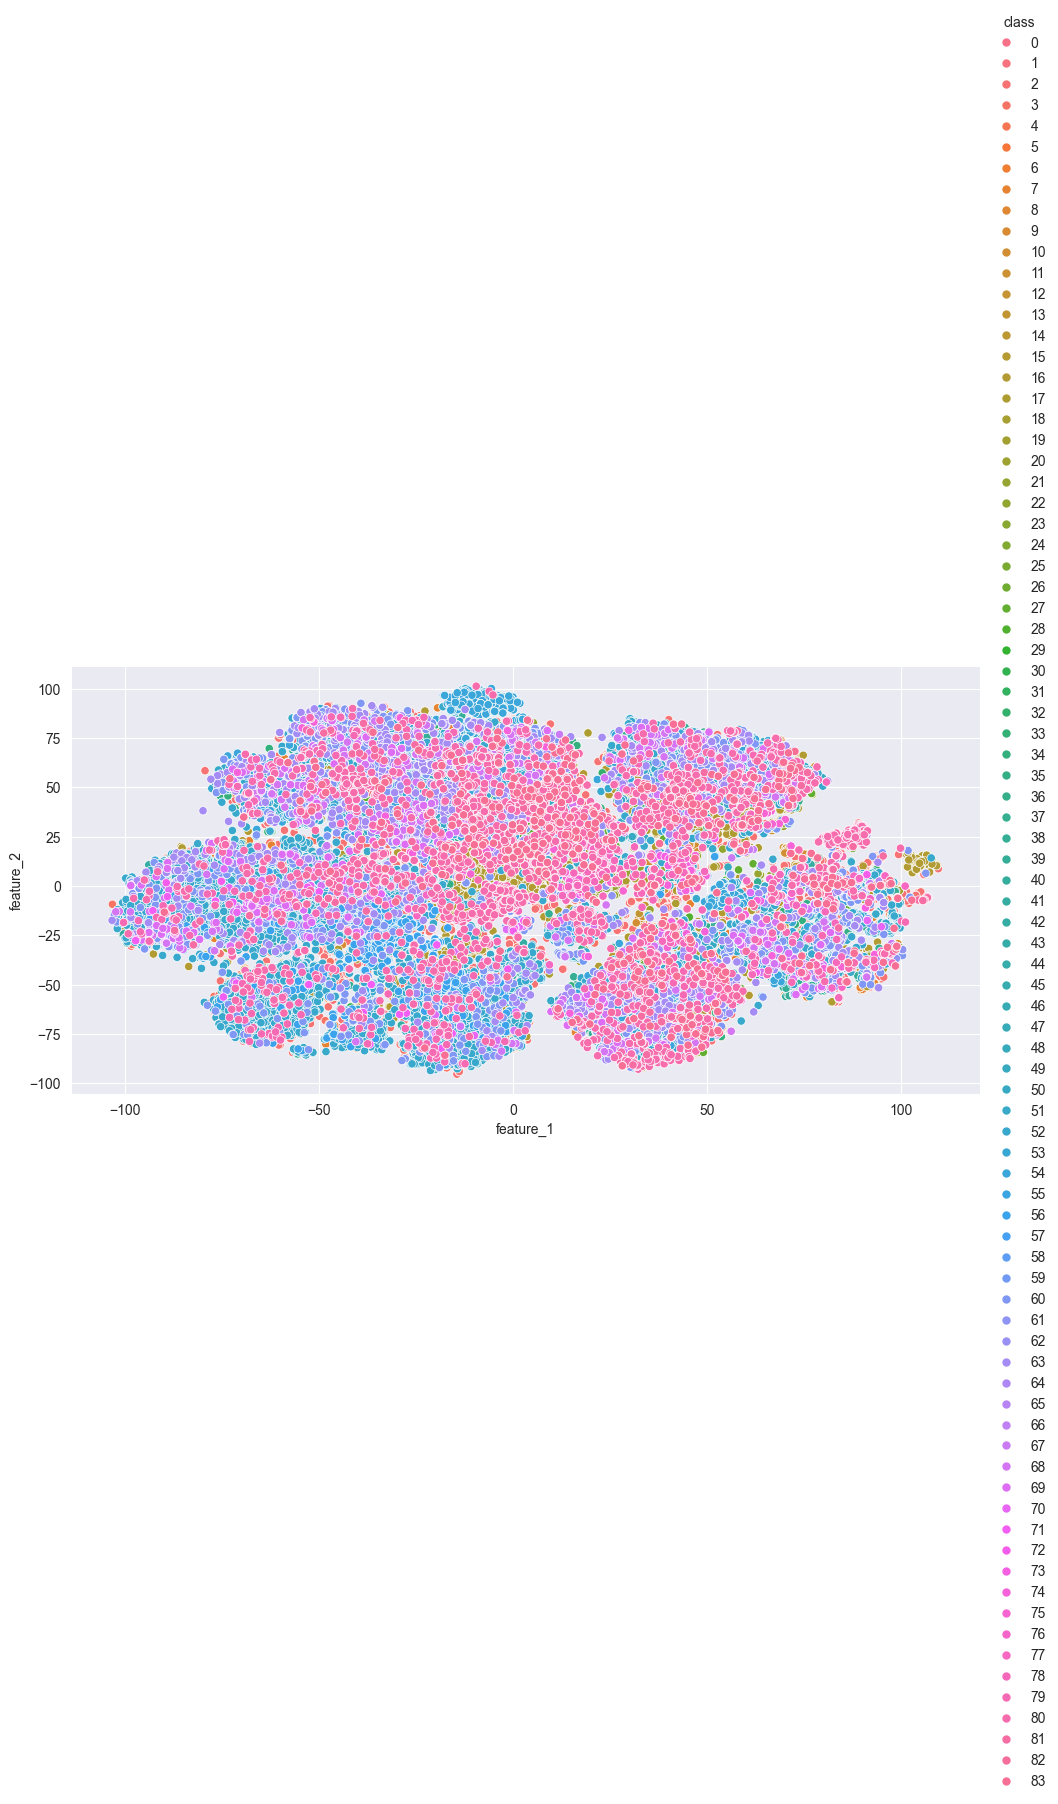

In [18]:
PCA_50 = PCA(n_components=50).fit_transform(features)
TSNE_2 = TSNE(n_components=2).fit_transform(PCA_50)
sns.relplot(data=create_dataset(TSNE_2, idx_classes), x="feature_1", y="feature_2", hue="class", aspect=2)